In [1]:
pip install umap-learn

  Stored in directory: C:\Users\Amichai\AppData\Local\pip\Cache\wheels\d0\f8\d5\8e3af3ee957feb9b403a060ebe72f7561887fef9dea658326e
Successfully built umap-learn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import umap
import time

import warnings
warnings.filterwarnings('ignore')

# Assignment
In this assignment, we will continue working with the [fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which is an image dataset that comprised of 70000 greyscale 28x28 images. The dataset contains 10 classes as follows:

 - T-shirt/top
 - Trouser/pants
 - Pullover shirt
 - Dress
 - Coat
 - Sandal
 - Shirt
 - Sneaker
 - Bag
 - Ankle boot
 
__Select 10000 images randomly and work on this sample in the following exercises.__

## 1. Loading the Dataset and Pre-Processing

In [2]:
# Load the MNIST dataset
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

# Randomly select 10000 samples
np.random.seed(123)

indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


## 2. Apply UMAP to the data.

In [3]:
# Computing the UMAP components
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 70.32524943351746 seconds


## 3. Using the two-dimensional UMAP representation, draw a graph of the data by coloring and labeling the data points as we did in the checkpoint.

In [4]:
plt.figure(figsize=(10,5))
colors = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"] #10 classes, 10 colors
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], str(y[i]),
             color=colors[int(y[i])],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## 4. Do you think UMAP solution is satisfactory? Can you distinguish between different classes easily? Which one has done a better job: UMAP or the others (t-SNE or PCA) that you applied in the assignments of the previous checkpoints?

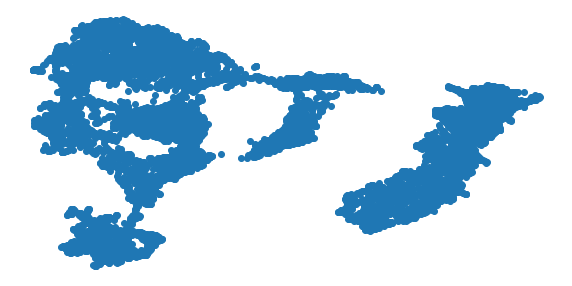

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP does a better job of clustering the different classes than PCA or t-SNE, but it still doesn't do a perfect job, as there are still a few clusters that contain a mixture of overlapping points belonging to different classes, as indicated by their different colors.

## 5. Now, play with the different hyperparameter values of the UMAP and apply UMAP for each of them. Which combination is the best in terms of the two-dimensional representation clarity?

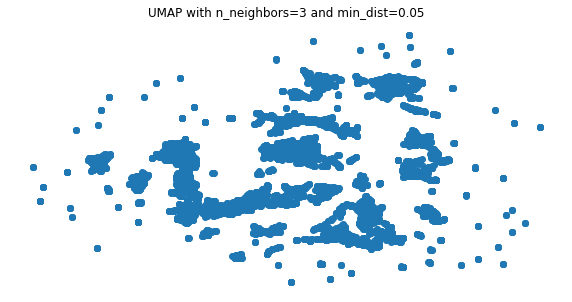

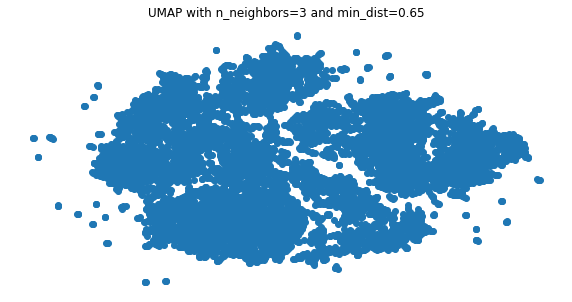

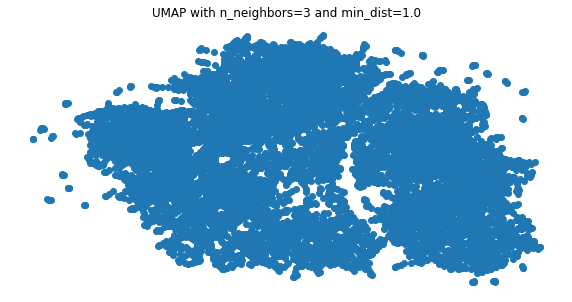

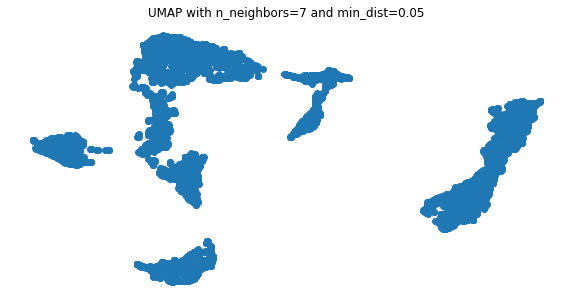

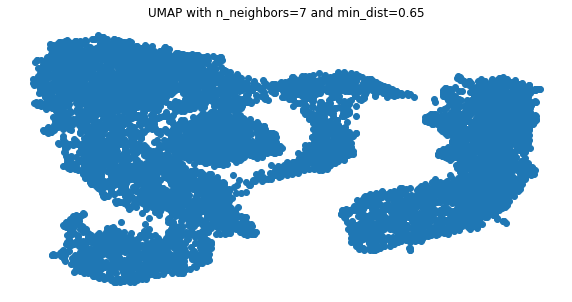

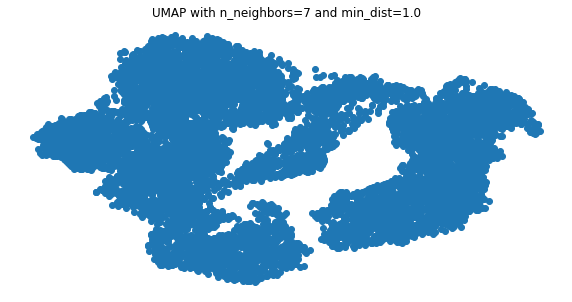

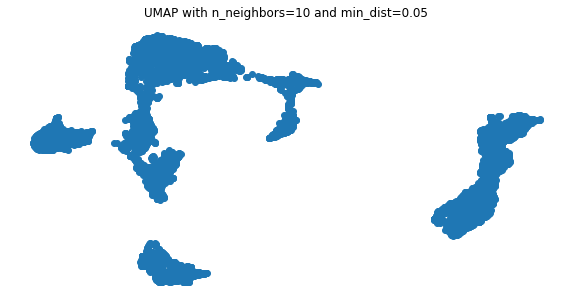

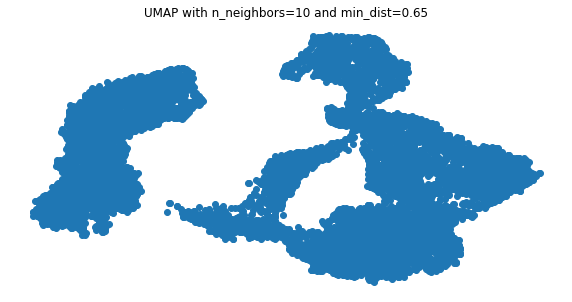

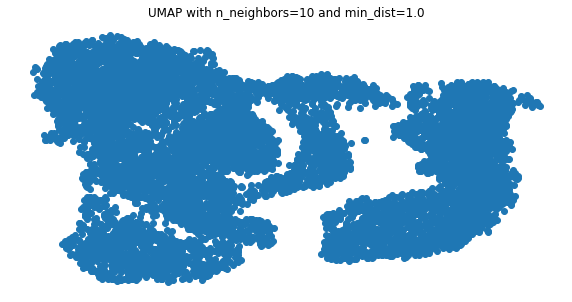

In [8]:
for neighbor in [3, 7, 10]:
    for dist in [0.05, 0.65, 1.0]:
        umap_results = umap.UMAP(n_neighbors=neighbor,
                          min_dist=dist,
                          metric='correlation').fit_transform(X)

        plt.figure(figsize=(10,5))
        plt.scatter(umap_results[:, 0], umap_results[:, 1])
        plt.xticks([])
        plt.yticks([])
        plt.axis('off')
        plt.title('UMAP with n_neighbors={} and min_dist={}'.format(neighbor, dist))
        plt.show()

Of these options, the two-dimensional representation with the highest levels of clarity were for the UMAP with n_neighbors = 7 and min_dist = 0.05. However, it is dificult to determine the best model definitively without colors and labels for the points within each cluster.